<a href="https://colab.research.google.com/github/DeveloperPratim/MAKATHON/blob/main/MAKATHON_Prototype_Pratim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAKATHON 2025
6 August, 2025


## Project Title  
**Real-Time Illicit Content Detection on Smartphones and Encrypted Messaging Apps Using On-Device AI Without Internet — A Privacy-Focused Approach**

---

## By  
**Pratim Sarkar**  
Department of Computer Applications,MAKAUT, WB

## Mentor  
**Mr. Sanchayan Bhaumik**  
Assistant Professor, Department of Computer Applications,MAKAUT, WB

---




#Module Name
Description




1. NSFW Image Detection
Detects pornographic or explicit images using CNN or Vision Transformer models.


2. Text-Based Inappropriate Detection
Flags abusive, profane, or explicit text using NLP and classification models.


3. CSAM Detection
Detects Child Sexual Abuse Material using perceptual hashes and classifiers.


4. Deepfake/Synthetic Media Detection
Identifies AI-generated explicit images or videos using forensic models.


5. Audio Content Analysis
Detects explicit speech using speech-to-text and text classification.


6. Encrypted Messaging Scanner
Local scanning of media/messages without decrypting end-to-end encryption.


7. Behavioral Pattern Analysis
Flags users repeatedly attempting to share suspicious or flagged content.


8. Metadata & EXIF Forensics
Detects tampering and source info via image/video metadata and forensic tools.


9. Lightweight Model Deployment
Optimized NSFW/abuse models for mobile/edge devices using ONNX/TFLite, etc.


10. Alert & Reporting System
Raises real-time alerts and generates reports for parental or legal action.


---


# Prototype Overview  
## NSFW Image Detection  
*This is a part of the Illicit Content Detection Project, a submodule*

This notebook presents a basic working prototype for detecting **NSFW (Not Safe For Woman)** content using a binary image classification model. It is designed as an essential submodule of 'real-time illicit content detection system' that aims to operate entirely **on-device** without the need for internet connectivity.

The primary objective of this sub module is to filter out sexually explicit images from user-uploaded content or private message attachments, thereby contributing to a larger goal of real-time moderation on secure or encrypted platforms.

---

## Classification Output

- **normal** — Safe, non-explicit content  
- **nsfw** — Sexually explicit or adult content

---

## Note

This prototype is limited to **NSFW detection** only. It does not yet handle other types of illicit content such as:
- Graphic violence  
- Weapon imagery  
- Drug-related content  etc

Full working System can be developed once project is approved and approval of funding..

In [ ]:


!pip install -q gdown transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 30.1 MB/s eta 0:00:00


---
---

From Drive saving model and file locally

---
---

In [ ]:


# Download the folder from Google Drive using gdown
import gdown
import os
from PIL import Image
import torch
from transformers import AutoModelForImageClassification, ViTImageProcessor
import glob

# Google Drive folder ID (from the link you shared)
folder_id = "1jyDvvErsdkde71RFOjgYJrZYEAqg7Zbo"

# Download to this local directory
local_folder = "/content/nsfw_images"
gdown.download_folder(id=folder_id, quiet=False, use_cookies=False)

# If it's already downloaded as a subfolder, correct the path
for entry in os.listdir():
    full_path = os.path.join("/content", entry)
    if os.path.isdir(full_path) and "nsfw" in entry.lower():
        local_folder = full_path
        break

print(f" Downloaded folder: {local_folder}")

Retrieving folder contents


Processing file 1-EBpYGIYO9ZysK3ZzCGPbXW6acgTFMT4 config.json
Processing file 1HhVWpuBW6ewgZDIn8iztnGvrNMf0YPIb labels.json
Processing file 1RJUE0D9VdK60t22o2ic6uZUglzjvdVbH preprocessor_config.json
Processing file 18TbLAvQN-V2l4od7WsskVcKB06VHmYjH pytorch_model.bin


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1-EBpYGIYO9ZysK3ZzCGPbXW6acgTFMT4
To: /content/nsfw_image_model/config.json
100%|██████████| 670/670 [00:00<00:00, 2.22MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HhVWpuBW6ewgZDIn8iztnGvrNMf0YPIb
To: /content/nsfw_image_model/labels.json
100%|██████████| 38.0/38.0 [00:00<00:00, 96.0kB/s]
Downloading...
From: https://drive.google.com/uc?id=1RJUE0D9VdK60t22o2ic6uZUglzjvdVbH
To: /content/nsfw_image_model/preprocessor_config.json
100%|██████████| 325/325 [00:00<00:00, 1.18MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=18TbLAvQN-V2l4od7WsskVcKB06VHmYjH
From (redirected): https://drive.google.com/uc?id=18TbLAvQN-V2l4od7WsskVcKB06VHmYjH&confirm=t&uuid=3772e808-51ea-4c54-8f6c-4c49353475ca
To: /content/nsfw_image_model/pytorch_model.bin
100%|██████████| 343M/343M [00:04<00:00, 83.8MB/s]

 Downloaded folder: /content/nsfw_image_model



Download completed


Creating a folder Name "images" and put your illicit images to check and test this prototype.

In [ ]:
import os

# Create /content/images folder if it doesn't exist
image_folder = "/content/images"
os.makedirs(image_folder, exist_ok=True)

print(f" Folder created (or a# gb  exists): {image_folder}")

 Folder created (or a# gb  exists): /content/images


Now this will search all image in that folder and try to detect wheather it is Safe for woman or not.

In [ ]:
import torch
from PIL import Image
import os
from transformers import AutoModelForImageClassification, ViTImageProcessor

# Local paths
MODEL_DIR = "/content/nsfw_image_model"
IMAGE_DIR = "/content/images"

# Load model and processor from local directory
model = AutoModelForImageClassification.from_pretrained(MODEL_DIR, local_files_only=True)
processor = ViTImageProcessor.from_pretrained(MODEL_DIR, local_files_only=True)

# Get image file paths
valid_ext = {'.jpg', '.jpeg', '.png', '.webp'}
image_paths = [os.path.join(IMAGE_DIR, f) for f in os.listdir(IMAGE_DIR) if os.path.splitext(f)[1].lower() in valid_ext]

# Check and process images
if not image_paths:
    print("No images found in", IMAGE_DIR)
else:
    print(f"Found {len(image_paths)} images")

for image_path in image_paths:
    try:
        img = Image.open(image_path).convert("RGB")
        inputs = processor(images=img, return_tensors="pt")

        with torch.no_grad():
            outputs = model(**inputs)
            logits = outputs.logits
            predicted_label = logits.argmax(-1).item()
            label = model.config.id2label[predicted_label]

        print(f"{os.path.basename(image_path)} → {label}")
    except Exception as e:
        print(f"Error processing {image_path}: {e}")

Found 3 images
a.jpeg → normal
images.jpeg → nsfw
Drug.jpeg → normal


In [ ]:

import torch
from PIL import Image
import os
import pandas as pd
import torch.nn.functional as F
from transformers import AutoModelForImageClassification, ViTImageProcessor

# Set paths
MODEL_DIR = "/content/nsfw_image_model"
IMAGE_DIR = "/content/images"

# Load model and processor
model = AutoModelForImageClassification.from_pretrained(MODEL_DIR, local_files_only=True)
processor = ViTImageProcessor.from_pretrained(MODEL_DIR, local_files_only=True)

# Acceptable image extensions
valid_ext = {'.jpg', '.jpeg', '.png', '.webp'}
image_paths = [os.path.join(IMAGE_DIR, f) for f in os.listdir(IMAGE_DIR) if os.path.splitext(f)[1].lower() in valid_ext]

# Check if any images found
if not image_paths:
    print("No valid images found in the directory.")
else:
    results = []
    for image_path in image_paths:
        try:
            img = Image.open(image_path).convert("RGB")
            exif_data = img.getexif()  # Try to get EXIF metadata (if present)
            metadata = {
                "Format": img.format or "Unknown",
                "Size": f"{img.size[0]}x{img.size[1]}",
                "Mode": img.mode,
                "EXIF Info": str({TAGS.get(k, k): v for k, v in exif_data.items()}) if exif_data else "None"
            }

            inputs = processor(images=img, return_tensors="pt")
            with torch.no_grad():
                outputs = model(**inputs)
                probs = F.softmax(outputs.logits, dim=1)[0]
                predicted_id = probs.argmax().item()
                label = model.config.id2label[predicted_id]
                score = probs[predicted_id].item() * 100

            results.append({
                "Image": os.path.basename(image_path),
                "Prediction": label,
                "Confidence (%)": f"{score:.2f}",
                "Format": metadata["Format"],
                "Size": metadata["Size"],
                "Mode": metadata["Mode"],
                "EXIF Info": metadata["EXIF Info"]
            })
        except Exception as e:
            results.append({
                "Image": os.path.basename(image_path),
                "Prediction": "Error",
                "Confidence (%)": "0.00",
                "Format": "Error",
                "Size": "Error",
                "Mode": "Error",
                "EXIF Info": str(e)
            })

    # Display as DataFrame
    df = pd.DataFrame(results)
    display(df)

,Image,Prediction,Confidence (%),Format,Size,Mode,EXIF Info
0,a.jpeg,normal,99.90,Unknown,205x246,RGB,None
1,images.jpeg,nsfw,99.99,Unknown,525x585,RGB,None
2,Drug.jpeg,normal,99.98,Unknown,678x452,RGB,None


1 NSFW image(s) detected out of 3.


Preview,Image,Prediction,Confidence (%),Format,Size,Mode,EXIF Info
,a.jpeg,normal,99.94,Unknown,53x64,RGB,None
,images.jpeg,nsfw,99.98,Unknown,57x64,RGB,None
,Drug.jpeg,normal,99.97,Unknown,64x43,RGB,None

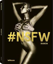
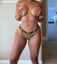
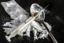

In [ ]:

import torch
from PIL import Image, ExifTags
import os
import pandas as pd
import torch.nn.functional as F
from transformers import AutoModelForImageClassification, ViTImageProcessor
from IPython.display import display, HTML
import base64
from io import BytesIO

# Set paths
MODEL_DIR = "/content/nsfw_image_model"
IMAGE_DIR = "/content/images"

# Load model and processor
model = AutoModelForImageClassification.from_pretrained(MODEL_DIR, local_files_only=True)
processor = ViTImageProcessor.from_pretrained(MODEL_DIR, local_files_only=True)

# Acceptable image extensions
valid_ext = {'.jpg', '.jpeg', '.png', '.webp'}
image_paths = [os.path.join(IMAGE_DIR, f) for f in os.listdir(IMAGE_DIR) if os.path.splitext(f)[1].lower() in valid_ext]

# Decode EXIF tag names
TAGS = ExifTags.TAGS

# Check if any images found
if not image_paths:
    print("⚠️ No valid images found in the directory.")
else:
    results = []
    nsfw_count = 0

    for image_path in image_paths:
        try:
            img = Image.open(image_path).convert("RGB")

            # Convert image to base64 thumbnail
            buffer = BytesIO()
            img.thumbnail((64, 64))
            img.save(buffer, format="PNG")
            img_b64 = base64.b64encode(buffer.getvalue()).decode()
            img_tag = f'<img src="data:image/png;base64,{img_b64}" width="50"/>'

            # Extract metadata
            exif_data = img.getexif()
            metadata = {
                "Format": img.format or "Unknown",
                "Size": f"{img.size[0]}x{img.size[1]}",
                "Mode": img.mode,
                "EXIF Info": str({TAGS.get(k, k): v for k, v in exif_data.items()}) if exif_data else "None"
            }

            inputs = processor(images=img, return_tensors="pt")
            with torch.no_grad():
                outputs = model(**inputs)
                probs = F.softmax(outputs.logits, dim=1)[0]
                predicted_id = probs.argmax().item()
                label = model.config.id2label[predicted_id]
                score = probs[predicted_id].item() * 100

            # Check if it's NSFW
            if "nsfw" in label.lower() or label.lower() in {"porn", "sexy", "hentai"}:
                nsfw_count += 1

            results.append({
                "Preview": img_tag,
                "Image": os.path.basename(image_path),
                "Prediction": label,
                "Confidence (%)": f"{score:.2f}",
                "Format": metadata["Format"],
                "Size": metadata["Size"],
                "Mode": metadata["Mode"],
                "EXIF Info": metadata["EXIF Info"]
            })

        except Exception as e:
            results.append({
                "Preview": "Error",
                "Image": os.path.basename(image_path),
                "Prediction": "Error",
                "Confidence (%)": "0.00",
                "Format": "Error",
                "Size": "Error",
                "Mode": "Error",
                "EXIF Info": str(e)
            })

    # Convert to DataFrame
    df = pd.DataFrame(results)

    # Highlight NSFW rows in red
    def highlight_nsfw(row):
        if "nsfw" in row["Prediction"].lower() or row["Prediction"].lower() in {"porn", "sexy", "hentai"}:
            return ['background-color: #ffcccc'] * len(row)
        return [''] * len(row)

    styled_df = df.style.apply(highlight_nsfw, axis=1).hide(axis='index')
    styled_df.set_table_attributes('style="width:100%;border-collapse:collapse"')

    print(f"{nsfw_count} NSFW image(s) detected out of {len(df)}.")
    display(HTML(styled_df.to_html(escape=False)))

In [ ]:
import json

config_path = "/content/nsfw_image_model/config.json"

try:
    with open(config_path, "r") as f:
        config = json.load(f)

    print("🛠️ Full Model Configuration:\n")
    import pprint
    pprint.pprint(config, sort_dicts=False)
except FileNotFoundError:
    print("❌ config.json not found at the given path.")
except json.JSONDecodeError as e:
    print(f"❌ Error decoding JSON: {e}")

🛠️ Full Model Configuration:

{'_name_or_path': 'Falconsai/nsfw_image_detection',
 'architectures': ['ViTForImageClassification'],
 'attention_probs_dropout_prob': 0.0,
 'encoder_stride': 16,
 'hidden_act': 'gelu',
 'hidden_dropout_prob': 0.0,
 'hidden_size': 768,
 'id2label': {'0': 'normal', '1': 'nsfw'},
 'image_size': 224,
 'initializer_range': 0.02,
 'intermediate_size': 3072,
 'label2id': {'normal': '0', 'nsfw': '1'},
 'layer_norm_eps': 1e-12,
 'model_type': 'vit',
 'num_attention_heads': 12,
 'num_channels': 3,
 'num_hidden_layers': 12,
 'patch_size': 16,
 'problem_type': 'single_label_classification',
 'qkv_bias': True,
 'torch_dtype': 'float32',
 'transformers_version': '4.31.0'}


In [ ]:
import os

model_dir = "/content/nsfw_image_model"

# Recursively list all files and directories
for root, dirs, files in os.walk(model_dir):
    level = root.replace(model_dir, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f"{subindent}{f}")

nsfw_image_model/
    model.safetensors
    pytorch_model.bin
    labels.json
    .gitattributes
    a.jpeg
    falconsai_yolov9_nsfw_model_quantized.pt
    preprocessor_config.json
    optimizer.pt
    config.json
    README.md
    .cache/
        huggingface/
            .gitignore
            download/
                pytorch_model.bin.metadata
                labels.json.metadata
                model.safetensors.lock
                pytorch_model.bin.lock
                optimizer.pt.lock
                .gitattributes.lock
                optimizer.pt.metadata
                preprocessor_config.json.lock
                README.md.lock
                model.safetensors.metadata
                labels.json.lock
                config.json.metadata
                config.json.lock
                falconsai_yolov9_nsfw_model_quantized.pt.metadata
                preprocessor_config.json.metadata
                falconsai_yolov9_nsfw_model_quantized.pt.lock
                README.md.